In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Input, Flatten

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
x_train.shape

(60000, 28, 28)

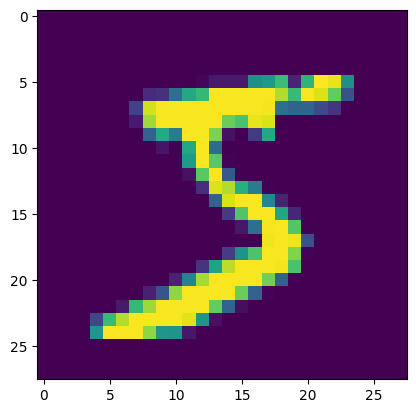

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
model = Sequential([
  Input(shape = (28,28)),
  Flatten(), 
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9181 - loss: 0.2891 - val_accuracy: 0.9537 - val_loss: 0.1635
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9624 - loss: 0.1273 - val_accuracy: 0.9653 - val_loss: 0.1200
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9747 - loss: 0.0866 - val_accuracy: 0.9691 - val_loss: 0.1006
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9720 - val_loss: 0.0935
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9772 - val_loss: 0.0833
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9766 - val_loss: 0.0822
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9765 - val_loss: 0.0854
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9925 - loss: 0

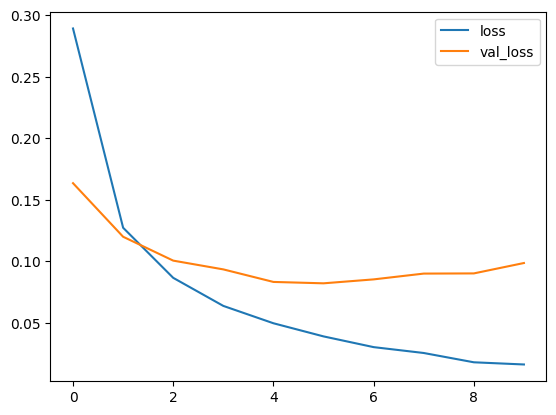

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

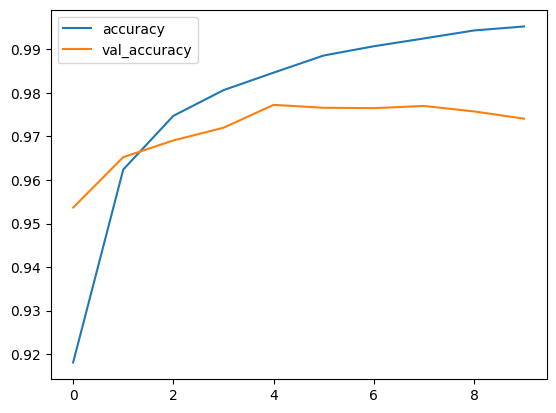

In [26]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [27]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
y_prob = y_prob.argmax(axis=1)

In [29]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_prob))

0.9752
